In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import tensorflow as tf
from tensorflow.keras import regularizers

In [83]:
len(tf.config.list_physical_devices('GPU'))

1

In [39]:
data=pd.read_csv("fashion-mnist_train.csv")

In [40]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data.shape

(60000, 785)

In [42]:
validation_data,train_data=data[:10000],data[10000:]

In [43]:
train_data.shape

(50000, 785)

In [44]:
validation_data.shape

(10000, 785)

In [45]:
train_data=np.array(train_data)
np.random.shuffle(train_data)
X_train=train_data[:,1:785]
Y_train=train_data[:,0]
X_train=X_train/255


validation_data=np.array(validation_data)
np.random.shuffle(validation_data)
X_validation=validation_data[:,1:785]
Y_validation=validation_data[:,0]
X_validation=X_validation/255

In [46]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18823529, 0.17647059,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
X=[]
for i,image in enumerate(X_train):
    image=image.reshape((28,28,1))
    X.append(image)
X=np.array(X)
X_train=X
    

In [75]:
X=[]
for i,image in enumerate(X_validation):
    image=image.reshape((28,28,1))
    X.append(image)
X=np.array(X)
X_validation=X
    

In [76]:
X_train.shape

(50000, 28, 28, 1)

In [77]:
Y_train

array([2, 5, 9, ..., 8, 5, 7], dtype=int64)

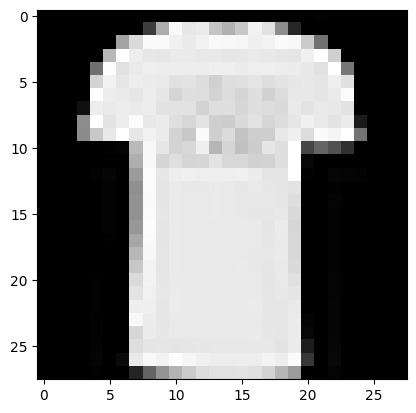

In [78]:
current_image=X_train[9,:]
#current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [79]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',padding="same",input_shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [80]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [81]:
BATCH_SIZE=20

In [84]:
model.fit(X_train,Y_train,epochs=5,steps_per_epoch=math.ceil(X_train.shape[0]/BATCH_SIZE))

Epoch 1/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5836 - accuracy: 0.8383
Epoch 2/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5597 - accuracy: 0.8451
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5411 - accuracy: 0.8502
Epoch 4/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5299 - accuracy: 0.8544
Epoch 5/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5140 - accuracy: 0.8583


In [85]:
Y_validation

array([7, 3, 0, ..., 6, 0, 1], dtype=int64)

In [86]:
validation_loss,validation_accuracy=model.evaluate(X_validation,Y_validation,steps=math.ceil(X_validation.shape[0]/BATCH_SIZE),verbose=2)

500/500 - 1s - loss: 0.4895 - accuracy: 0.8672


In [95]:
test_data=pd.read_csv("fashion-mnist_test.csv")

In [96]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
test_data=np.array(test_data)
np.random.shuffle(test_data)
X_test=test_data[:,1:785]
Y_test=test_data[:,0]
X_test=X_test/255

In [98]:
_,test_accuracy=model.evaluate(X_test,Y_test,steps=math.ceil(X_test.shape[0]/BATCH_SIZE),verbose=2)

500/500 - 1s - loss: 0.3329 - accuracy: 0.8892 - 657ms/epoch - 1ms/step
